<a href="https://colab.research.google.com/github/urmilapol/urmilapolprojects/blob/master/pycaretclassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pycaret pandas shap

     |████████████████████████████████| 266 kB 5.3 MB/s 
     |████████████████████████████████| 371 kB 38.7 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 167 kB 58.2 MB/s 
     |████████████████████████████████| 261 kB 51.1 MB/s 
     |████████████████████████████████| 271 kB 52.4 MB/s 
     |████████████████████████████████| 2.0 MB 35.8 MB/s 
     |████████████████████████████████| 113 kB 47.2 MB/s 
     |████████████████████████████████| 1.3 MB 17.1 MB/s 
     |████████████████████████████████| 6.8 MB 46.4 MB/s 
     |████████████████████████████████| 16.9 MB 40 kB/s 
     |████████████████████████████████| 86 kB 5.3 MB/s 
     |████████████████████████████████| 1.7 MB 50.5 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |███████

In [2]:
 import pandas as pd

In [3]:
from pycaret.classification import * 

In [5]:
df = pd.read_csv('/content/heart.csv') 

In [6]:
df.head() 

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [7]:
df.dtypes 

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [23]:
cat_features = [ 'sex', 'cp', 'fbs', 'restecg', 'exang','thal'] 

In [24]:
experiment = setup(df, target='target', categorical_features=cat_features)  

,Description,Value
0,session_id,498
1,Target,target
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(303, 14)"
5,Missing Values,False
6,Numeric Features,5
7,Categorical Features,8
8,Ordinal Features,False
9,High Cardinality Features,False


In [14]:
 best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ridge,Ridge Classifier,0.8628,0.0000,0.9038,0.8532,0.8763,0.7224,0.7276,0.015
lda,Linear Discriminant Analysis,0.8628,0.9171,0.9038,0.8531,0.8768,0.7224,0.7259,0.019
lr,Logistic Regression,0.8444,0.9192,0.8621,0.8552,0.8536,0.6879,0.6969,0.508
rf,Random Forest Classifier,0.8396,0.9083,0.8780,0.8397,0.8539,0.6753,0.6866,0.481
et,Extra Trees Classifier,0.8396,0.8981,0.8689,0.8461,0.8530,0.6758,0.6842,0.471
nb,Naive Bayes,0.8344,0.8792,0.8076,0.8857,0.8371,0.6692,0.6828,0.019
gbc,Gradient Boosting Classifier,0.8013,0.8857,0.8159,0.8196,0.8133,0.6002,0.6084,0.098
lightgbm,Light Gradient Boosting Machine,0.7781,0.8731,0.7992,0.7968,0.7932,0.5530,0.5620,0.075
ada,Ada Boost Classifier,0.7695,0.8169,0.8174,0.7738,0.7910,0.5324,0.5407,0.112
dt,Decision Tree Classifier,0.7210,0.7232,0.7220,0.7612,0.7374,0.4418,0.4471,0.018


In [15]:
predict_model(best_model, df.tail()) 

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,Label
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0,1
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0,1


In [16]:
save_model(best_model, model_name='ridge-model') 

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=['sex', 'cp', 'fbs',
                                                             'restecg', 'exang',
                                                             'thal'],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='target',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=Non...
                 ('fix_perfect', Remove_100(target='target')),
                 ('clean_names', Clean_Colum_Names()),
                 ('feature_select', 'passthrough'), ('fix_multi', 'passthrough'),
               

In [17]:
model = load_model('ridge-model') 

Transformation Pipeline and Model Successfully Loaded


In [18]:
model.predict(df.tail()) 

array([0, 1, 0, 0, 1])

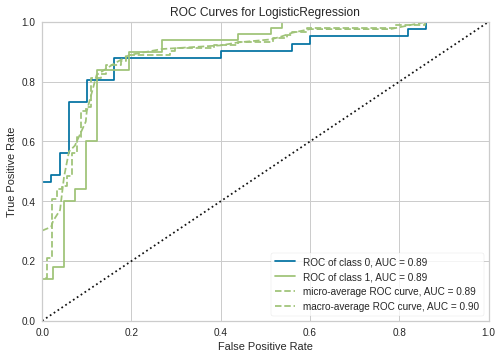

In [19]:

lr = create_model('lr')
plot_model(lr)


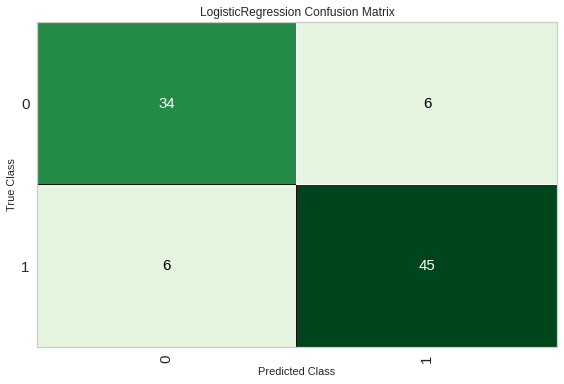

In [29]:
plot_model(lr, plot = 'confusion_matrix')

In [20]:
knn = create_model('knn')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.4545,0.5250,0.5000,0.5000,0.5000,-0.1000,-0.1000
1,0.6818,0.8167,0.6667,0.7273,0.6957,0.3636,0.3651
2,0.5714,0.6713,0.5833,0.6364,0.6087,0.1370,0.1376
3,0.6667,0.7130,0.8333,0.6667,0.7407,0.2899,0.3043
4,0.7143,0.7824,0.6667,0.8000,0.7273,0.4324,0.4404
5,0.5714,0.5545,0.7273,0.5714,0.6400,0.1290,0.1348
6,0.5714,0.6591,0.4545,0.6250,0.5263,0.1525,0.1589
7,0.5714,0.6409,0.5455,0.6000,0.5714,0.1448,0.1455
8,0.5238,0.6182,0.5455,0.5455,0.5455,0.0455,0.0455
9,0.6667,0.6273,0.7273,0.6667,0.6957,0.3288,0.3303


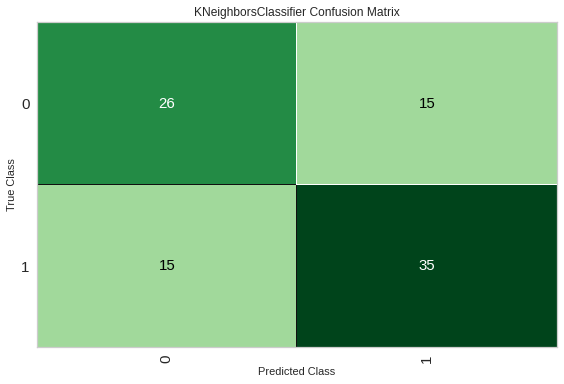

In [21]:
plot_model(knn, plot = 'confusion_matrix') 

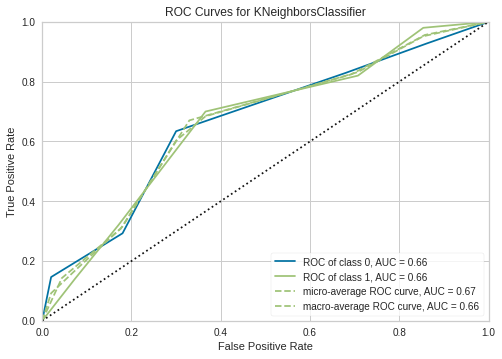

In [22]:
plot_model(knn)